# Planar stationary heat problem
[![Google Collab Book](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/meyer-nils/torch-fem/blob/main/examples/basic/planar/finite_strain.ipynb)

Compute the stationary temperature distribution in a planar problem.

In [4]:
import torch

import matplotlib.pyplot as plt
from torchfem.examples import get_example_file
from torchfem.io import import_mesh
from torchfem.materials import IsotropicConductivity2D
from torchfem.planar import PlanarHeat

# Set default data type to double precision
torch.set_default_dtype(torch.float64)

# Dimensions (thickness of plate t and edge length L)
t = 0.01
L = 0.2


## Static heat equation on planar domain

In [5]:
# Material model 
material = IsotropicConductivity2D(kappa=1000.0)

# Import mesh
mesh = import_mesh(get_example_file("plate_hole.vtk"), material)

plate = PlanarHeat(mesh.nodes, mesh.elements, material)
plate.thickness[:] = t

# Fixed boundary at left end
left = plate.nodes[:, 0] < 1e-6
plate.constraints[left] = True
plate.displacements[left, 0] = 10.0

# Load at right end
right = plate.nodes[:, 0] > L - 1e-6
plate.constraints[right] = True
plate.displacements[right, 0] = 20.0

# Solve
temp, rfl, hf, temp_grad, _ = plate.solve()



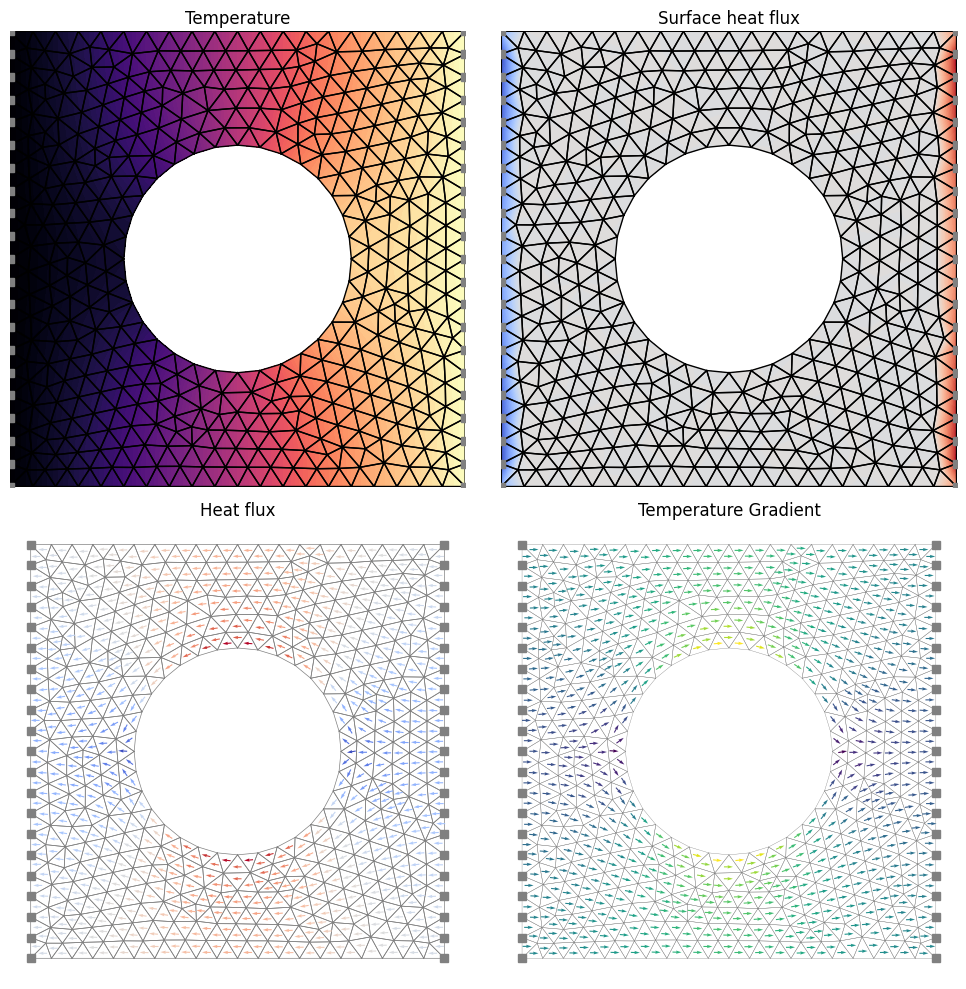

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

plate.plot(
    node_property=temp.ravel(),
    cmap="magma",
    title="Temperature",
    ax=ax1,
)
plate.plot(
    node_property=rfl.ravel(),
    cmap="coolwarm",
    title="Surface heat flux",
    ax=ax2,
)
plate.plot(
    element_vector_field=-hf,  # negative sign
    cmap="coolwarm",
    title="Heat flux",
    color="gray",
    linewidth=0.5,
    normalized_vector_field=True,
    ax=ax3,
)
plate.plot(
    element_vector_field=temp_grad,
    title="Temperature Gradient",
    ax=ax4,
    cmap="viridis",
    color="gray",
    linewidth=0.25,
    normalized_vector_field=True
)
plt.tight_layout()
# plt.show()